<a href="https://colab.research.google.com/github/SLVmain/Neural_Network_start/blob/Les_04/HW_04_part2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в искусственные нейронные сети
# Урок 4. Сверточные нейронные сети
# Часть 2

## Практическое задание

Вариант 2. (сложный)
- реализовать нейронную сеть или стек из сверток (Concatenate) на сifar10.
- оценить рост точности при увеличении ширины сети (больше ядер), больше нитей.
- оценить рост точности при увеличении глубины сети (больше слоев)
    </li>
</ol>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from __future__ import print_function
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, GlobalMaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import os
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical, plot_model 
import random

In [2]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

170508288/170498071 [==============================] - 4s 0us/step


In [4]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')
y_train[0]

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [5]:
metrics_list_cifar = []

Строим сеть из трех нитей

In [6]:
input_size = x_train.shape[1:]

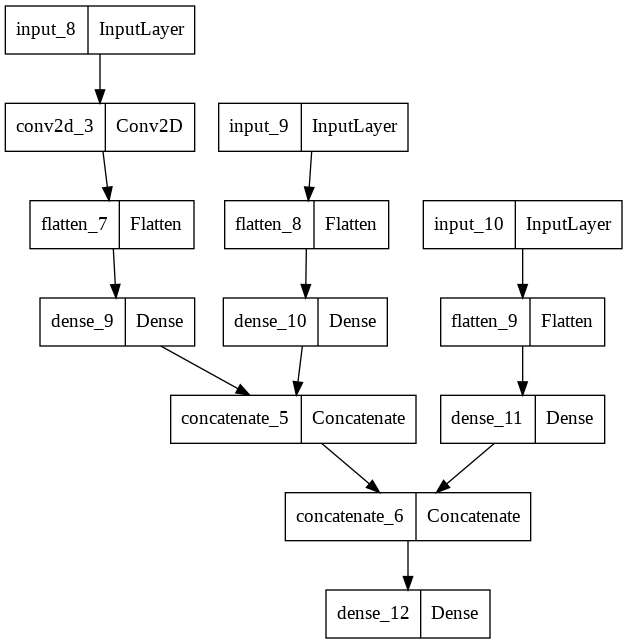

In [14]:
#построим модель с урока
first_input = Input(shape=input_size)
x11= Conv2D(10,3,activation='relu')(first_input)
x11= Flatten()(x11)
first_dense = Dense(1, )(x11)

second_input = Input(shape=input_size)
x22= Flatten()(second_input)
second_dense = Dense(1, )(x22)

merge_one = Concatenate()([first_dense, second_dense])

third_input = Input(shape=input_size)
x33= Flatten()(third_input)
x33 = Dense(1, )(x33)

merge_two = Concatenate(axis=1)([merge_one, x33])
merge_two=Dense(10, activation='softmax')(merge_two)


model_stek = Model(inputs=[first_input, second_input, third_input], outputs=merge_two)
ada_grad = tf.keras.optimizers.Adagrad(learning_rate=0.1, epsilon=1e-08, decay=0.0)
model_stek.compile(optimizer=ada_grad, loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


plot_model(model_stek,'model_stek.png')


In [15]:
model_stek.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 30, 30, 10)   280         ['input_8[0][0]']                
                                                                                                  
 input_9 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 flatten_7 (Flatten)            (None, 9000)         0           ['conv2d_3[0][0]']               
                                                                                            

In [16]:
hist = model_stek.fit([x_train,x_train,x_train],y_train, epochs = 20, validation_split=0.2, verbose=1)

Epoch 1/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3491 - accuracy: 0.2207 - val_loss: 2.0709 - val_accuracy: 0.2254
Epoch 2/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9759 - accuracy: 0.2636 - val_loss: 1.9361 - val_accuracy: 0.2812
Epoch 3/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9129 - accuracy: 0.2948 - val_loss: 1.9413 - val_accuracy: 0.2818
Epoch 4/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8701 - accuracy: 0.3146 - val_loss: 1.8592 - val_accuracy: 0.3289
Epoch 5/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8429 - accuracy: 0.3268 - val_loss: 1.8406 - val_accuracy: 0.3329
Epoch 6/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8185 - accuracy: 0.3332 - val_loss: 1.8347 - val_accuracy: 0.3185
Epoch 7/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8016 - accuracy: 0.3379 - val_loss: 1.8031 - val_accuracy:

In [17]:
metrics_list_cifar = metrics_list_cifar + [['3 concat', '_', round(model_stek.evaluate([x_test, x_test, x_test], y_test, verbose = 0)[1], 3)]]
metrics_list_cifar

[['3 concat', '_', 0.372], ['3 concat', '_', 0.352]]

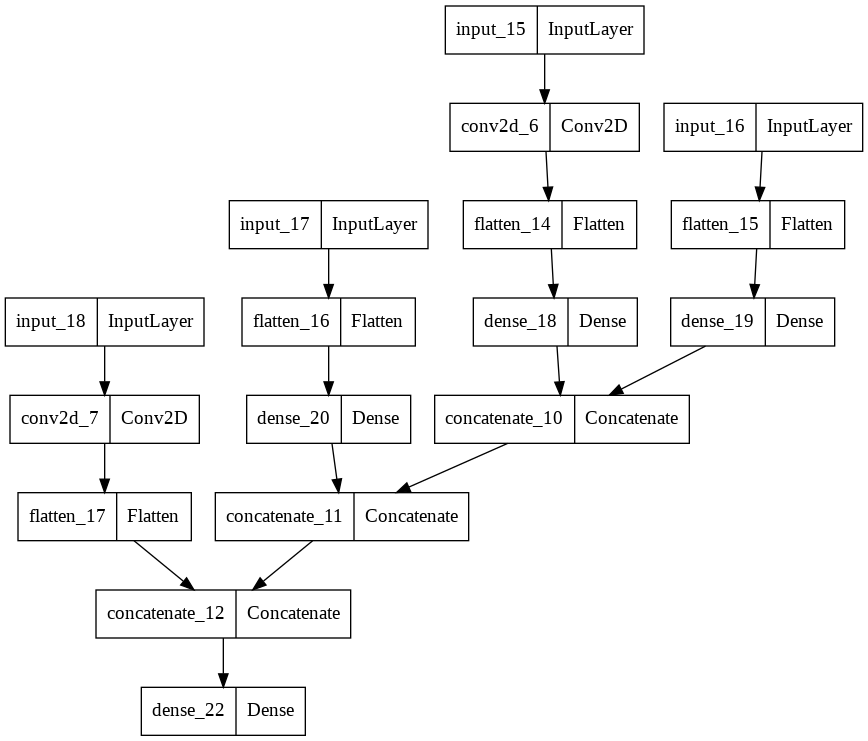

In [20]:
#добавим еще модель
first_input = Input(shape=input_size)
x11= Conv2D(10,3,activation='relu')(first_input)
x11= Flatten()(x11)
first_dense = Dense(1, )(x11)

second_input = Input(shape=input_size)
x22= Flatten()(second_input)
second_dense = Dense(1, )(x22)

merge_one = Concatenate()([first_dense, second_dense])

third_input = Input(shape=input_size)
x33= Flatten()(third_input)
x33 = Dense(1, )(x33)

merge_two = Concatenate(axis=1)([merge_one, x33])

forth_input = Input(shape=input_size)
x44= Conv2D(10,3,activation='relu')(forth_input)
x44= Flatten()(x44)
forth_dense = Dense(1, )(x44)


merge_three = Concatenate(axis=1)([merge_two, x44])
merge_three=Dense(10, activation='softmax')(merge_three)



model_stek1 = Model(inputs=[first_input, second_input, third_input, forth_input], outputs=merge_three)
ada_grad = tf.keras.optimizers.Adagrad(learning_rate=0.1, epsilon=1e-08, decay=0.0)
model_stek1.compile(optimizer=ada_grad, loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])


plot_model(model_stek1,'model_stek1.png')

In [21]:
hist1 = model_stek1.fit([x_train, x_train, x_train, x_train],y_train, epochs = 20, validation_split=0.2, verbose=1)

Epoch 1/20
1250/1250 [==============================] - 6s 4ms/step - loss: 1.8017 - accuracy: 0.3474 - val_loss: 1.6234 - val_accuracy: 0.4219
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5417 - accuracy: 0.4569 - val_loss: 1.5171 - val_accuracy: 0.4630
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4588 - accuracy: 0.4850 - val_loss: 1.5488 - val_accuracy: 0.4463
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4170 - accuracy: 0.4980 - val_loss: 1.5193 - val_accuracy: 0.4708
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3876 - accuracy: 0.5080 - val_loss: 1.4800 - val_accuracy: 0.4730
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3645 - accuracy: 0.5173 - val_loss: 1.4975 - val_accuracy: 0.4745
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3477 - accuracy: 0.5194 - val_loss: 1.4635 - val_accuracy:

In [22]:
metrics_list_cifar = metrics_list_cifar + [['4 concat', '_', round(model_stek1.evaluate([x_test, x_test, x_test, x_test], y_test, verbose = 0)[1], 3)]]
metrics_list_cifar

[['3 concat', '_', 0.372], ['3 concat', '_', 0.352], ['4 concat', '_', 0.48]]

4-ая модель улучшила точность
добавим больше ядер

In [23]:
first_input1 = Input(shape=input_size)
x111= Conv2D(128,3,activation='relu')(first_input1)
x111= Flatten()(x111)
first_dense1 = Dense(1, )(x111)

second_input1 = Input(shape=input_size)
x222= Flatten()(second_input1)
second_dense1 = Dense(1, )(x222)

merge_one1 = Concatenate()([first_dense1, second_dense1])

third_input1 = Input(shape=input_size)
x333= Flatten()(third_input1)
x333 = Dense(1, )(x333)

merge_two1 = Concatenate(axis=1)([merge_one1, x333])

forth_input1 = Input(shape=input_size)
x444= Conv2D(256,3,activation='relu')(forth_input1)
x444= Flatten()(x444)
forth_dense1 = Dense(1, )(x444)


merge_three1 = Concatenate(axis=1)([merge_two1, x444])
merge_three1=Dense(10, activation='softmax')(merge_three1)



model_stek2 = Model(inputs=[first_input1, second_input1, third_input1, forth_input1], outputs=merge_three1)
ada_grad = tf.keras.optimizers.Adagrad(learning_rate=0.1, epsilon=1e-08, decay=0.0)
model_stek2.compile(optimizer=ada_grad, loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [24]:
hist2 = model_stek2.fit([x_train, x_train, x_train, x_train],y_train, epochs = 20, validation_split=0.2, verbose=1)

Epoch 1/20
1250/1250 [==============================] - 10s 7ms/step - loss: 1.9313 - accuracy: 0.3019 - val_loss: 1.7004 - val_accuracy: 0.3833
Epoch 2/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.6218 - accuracy: 0.4115 - val_loss: 1.5411 - val_accuracy: 0.4421
Epoch 3/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.4752 - accuracy: 0.4696 - val_loss: 1.5088 - val_accuracy: 0.4540
Epoch 4/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.3824 - accuracy: 0.5045 - val_loss: 1.4421 - val_accuracy: 0.4857
Epoch 5/20
1250/1250 [==============================] - 8s 7ms/step - loss: 1.3232 - accuracy: 0.5241 - val_loss: 1.4781 - val_accuracy: 0.4764
Epoch 6/20
1250/1250 [==============================] - 8s 7ms/step - loss: 1.2676 - accuracy: 0.5458 - val_loss: 1.4089 - val_accuracy: 0.5076
Epoch 7/20
1250/1250 [==============================] - 8s 7ms/step - loss: 1.2014 - accuracy: 0.5741 - val_loss: 1.3939 - val_accuracy

In [25]:
metrics_list_cifar = metrics_list_cifar + [['4 concat', '128-256', round(model_stek2.evaluate([x_test, x_test, x_test, x_test], y_test, verbose = 0)[1], 3)]]


In [26]:
metrics_list_cifar

[['3 concat', '_', 0.372],
 ['3 concat', '_', 0.352],
 ['4 concat', '_', 0.48],
 ['4 concat', '128-256', 0.547]]

увеличение ядер увеличило точность до 0.547

In [27]:
#возьмем сеть из первой части домашки и сделаем стек из параллельных сетей


first_input2 = Input(shape=input_size)
x1111= Conv2D(256, 3, padding='same',activation='relu')(first_input2)
x1111 = Conv2D(256, 3, padding='same', activation='relu')(x1111)
x1111 = MaxPooling2D()(x1111)
x1111 = Dropout(0.4)(x1111)
x1111= Flatten()(x1111)
first_dense2 = Dense(1, )(x1111)


second_input2 = Input(shape=input_size)
x2222 = Conv2D(128, 3, padding='same', activation='relu')(second_input2)
x2222 = Conv2D(128, 3, padding='same', activation='relu')(x2222)
x2222 = MaxPooling2D()(x2222)
x2222 = Dropout(0.4)(x2222)

x2222= Flatten()(x2222)
second_dense2 = Dense(1, )(x2222)

merge_one2 = Concatenate()([first_dense2, second_dense2])

third_input2 = Input(shape=input_size)
x3333 = Conv2D(64, 3, padding='same', activation='relu')(third_input2)
x3333 = Conv2D(64, 3, padding='same', activation='relu')(x3333)
x3333 = Dropout(0.4)(x3333)
x3333= Flatten()(x3333)
x3333 = Dense(1, )(x3333)
    

merge_two2 = Concatenate(axis=1)([merge_one2, x3333])

forth_input2 = Input(shape=input_size)
x4444= Conv2D(32, 3, padding='same', activation='relu')(forth_input2)
x4444 = Conv2D(32, 3, padding='same', activation='relu')(x4444)
x4444 = Dropout(0.4)(x4444)
x4444= Flatten()(x4444)
forth_dense2 = Dense(1, )(x4444)


merge_three2 = Concatenate(axis=1)([merge_two2, x4444])


merge_three2 = Dense(1024, activation='relu')(merge_three2)
merge_three2 = Dropout(0.2)(merge_three2)
merge_three2 = Dense(512, activation='relu')(merge_three2)
merge_three2=Dense(10, activation='softmax')(merge_three2)


model_stek3 = Model(inputs=[first_input2, second_input2, third_input2, forth_input2], outputs=merge_three2)
ada_grad = tf.keras.optimizers.Adagrad(learning_rate=0.1, epsilon=1e-08, decay=0.0)
model_stek3.compile(optimizer=ada_grad, loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [28]:
hist3 = model_stek3.fit([x_train, x_train, x_train, x_train],y_train, epochs = 20, validation_split=0.2, verbose=1)

Epoch 1/20
1250/1250 [==============================] - 29s 23ms/step - loss: 2.0187 - accuracy: 0.2271 - val_loss: 1.7267 - val_accuracy: 0.3583
Epoch 2/20
1250/1250 [==============================] - 27s 22ms/step - loss: 1.5690 - accuracy: 0.4193 - val_loss: 1.4864 - val_accuracy: 0.4570
Epoch 3/20
1250/1250 [==============================] - 27s 22ms/step - loss: 1.3670 - accuracy: 0.4963 - val_loss: 1.2933 - val_accuracy: 0.5193
Epoch 4/20
1250/1250 [==============================] - 28s 22ms/step - loss: 1.2234 - accuracy: 0.5495 - val_loss: 1.2003 - val_accuracy: 0.5658
Epoch 5/20
1250/1250 [==============================] - 27s 22ms/step - loss: 1.0932 - accuracy: 0.6013 - val_loss: 1.1802 - val_accuracy: 0.5731
Epoch 6/20
1250/1250 [==============================] - 27s 22ms/step - loss: 0.9486 - accuracy: 0.6560 - val_loss: 1.1031 - val_accuracy: 0.6110
Epoch 7/20
1250/1250 [==============================] - 27s 22ms/step - loss: 0.8005 - accuracy: 0.7081 - val_loss: 1.0817 -

In [29]:
metrics_list_cifar = metrics_list_cifar + [['4 concat', '1_part_model', round(model_stek3.evaluate([x_test, x_test, x_test, x_test], y_test, verbose = 0)[1], 3)]]

In [30]:
metrics_list_cifar

[['3 concat', '_', 0.372],
 ['3 concat', '_', 0.352],
 ['4 concat', '_', 0.48],
 ['4 concat', '128-256', 0.547],
 ['4 concat', '1_part_model', 0.641]]

модель повысила точность по сравнению с model_stek2, но в сравнении с моделью из первой части домашнего задания, где слои работали последовательно (точность была 0,78), она проигрывает, что и понятно, так как идея была как раз в последовательной обратотке слоев.

In [31]:
#добавим две модели: с уменьшающимся последовательным кол-вом фильтров и вторая - с повышающимся кол-вом фильтров
first_input3 = Input(shape=input_size)
x11111= Conv2D(256, 3, padding='same',activation='relu')(first_input3)
x11111 = Conv2D(256, 3, padding='same', activation='relu')(x11111)
x11111 = MaxPooling2D()(x11111)
x11111 = Dropout(0.4)(x11111)
x11111 = Conv2D(128, 3, padding='same',activation='relu')(x11111)
x11111 = Conv2D(128, 3, padding='same', activation='relu')(x11111)
x11111 = MaxPooling2D()(x11111)
x11111 = Dropout(0.4)(x11111)
x11111= Conv2D(64, 3, padding='same',activation='relu')(x11111)
x11111 = Conv2D(64, 3, padding='same', activation='relu')(x11111)
x11111 = Dropout(0.4)(x11111)
x11111= Conv2D(32, 3, padding='same',activation='relu')(x11111)
x11111 = Conv2D(32, 3, padding='same', activation='relu')(x11111)
x11111 = Dropout(0.4)(x11111)
x11111= Flatten()(x11111)
first_dense3 = Dense(1, )(x11111)

second_input3 = Input(shape=input_size)
x22222= Conv2D(32, 3, padding='same',activation='relu')(second_input3)
x22222 = Conv2D(32, 3, padding='same', activation='relu')(x22222)
x22222 = MaxPooling2D()(x22222)
x22222 = Dropout(0.4)(x22222)
x22222 = Conv2D(64, 3, padding='same',activation='relu')(x22222)
x22222 = Conv2D(64, 3, padding='same', activation='relu')(x22222)
x22222 = MaxPooling2D()(x22222)
x22222 = Dropout(0.4)(x22222)
x22222= Conv2D(128, 3, padding='same',activation='relu')(x22222)
x22222 = Conv2D(128, 3, padding='same', activation='relu')(x22222)
x22222 = Dropout(0.4)(x22222)
x22222= Conv2D(256, 3, padding='same',activation='relu')(x22222)
x22222 = Conv2D(256, 3, padding='same', activation='relu')(x22222)
x22222 = Dropout(0.4)(x22222)
x22222= Flatten()(x22222)
second_dense3 = Dense(1, )(x22222)


merge_three3 = Concatenate()([first_dense3, second_dense3])


merge_three3 = Dense(1024, activation='relu')(merge_three3)
merge_three3 = Dropout(0.2)(merge_three3)
merge_three3 = Dense(512, activation='relu')(merge_three3)
merge_three3=Dense(10, activation='softmax')(merge_three3)


model_stek4 = Model(inputs=[first_input3, second_input3], outputs=merge_three3)
ada_grad = tf.keras.optimizers.Adagrad(learning_rate=0.01, epsilon=1e-08, decay=0.0)
model_stek4.compile(optimizer=ada_grad, loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [32]:
hist4 = model_stek4.fit([x_train, x_train],y_train, epochs = 20, validation_split=0.2, verbose=1)

Epoch 1/20
1250/1250 [==============================] - 24s 18ms/step - loss: 2.2074 - accuracy: 0.1519 - val_loss: 2.1220 - val_accuracy: 0.1699
Epoch 2/20
1250/1250 [==============================] - 22s 18ms/step - loss: 1.9524 - accuracy: 0.2018 - val_loss: 1.8724 - val_accuracy: 0.2223
Epoch 3/20
1250/1250 [==============================] - 22s 18ms/step - loss: 1.8731 - accuracy: 0.2308 - val_loss: 1.9674 - val_accuracy: 0.2088
Epoch 4/20
1250/1250 [==============================] - 22s 18ms/step - loss: 1.8386 - accuracy: 0.2510 - val_loss: 1.8480 - val_accuracy: 0.2500
Epoch 5/20
1250/1250 [==============================] - 22s 18ms/step - loss: 1.8135 - accuracy: 0.2589 - val_loss: 1.8824 - val_accuracy: 0.2551
Epoch 6/20
1250/1250 [==============================] - 23s 18ms/step - loss: 1.7896 - accuracy: 0.2705 - val_loss: 1.8211 - val_accuracy: 0.2678
Epoch 7/20
1250/1250 [==============================] - 22s 18ms/step - loss: 1.7646 - accuracy: 0.2799 - val_loss: 1.7480 -

In [33]:
metrics_list_cifar = metrics_list_cifar + [['2 concat', '1_part_2 model3_reverse', round(model_stek4.evaluate([x_test, x_test], y_test, verbose = 0)[1], 3)]]

In [34]:
metrics_list_cifar

[['3 concat', '_', 0.372],
 ['3 concat', '_', 0.352],
 ['4 concat', '_', 0.48],
 ['4 concat', '128-256', 0.547],
 ['4 concat', '1_part_model', 0.641],
 ['2 concat', '1_part_2 model3_reverse', 0.564]]

точность не улучшилась

In [35]:
#сделаем две одинаковых модели параллельно
first_input4 = Input(shape=input_size)
x111111= Conv2D(256, 3, padding='same',activation='relu')(first_input4)
x111111 = Conv2D(256, 3, padding='same', activation='relu')(x111111)
x111111 = MaxPooling2D()(x111111)
x111111 = Dropout(0.4)(x111111)
x111111 = Conv2D(128, 3, padding='same',activation='relu')(x111111)
x111111 = Conv2D(128, 3, padding='same', activation='relu')(x111111)
x111111 = MaxPooling2D()(x111111)
x111111 = Dropout(0.4)(x111111)
x111111= Conv2D(64, 3, padding='same',activation='relu')(x111111)
x111111 = Conv2D(64, 3, padding='same', activation='relu')(x111111)
x111111 = Dropout(0.4)(x111111)
x111111= Conv2D(32, 3, padding='same',activation='relu')(x111111)
x111111 = Conv2D(32, 3, padding='same', activation='relu')(x111111)
x111111 = Dropout(0.4)(x111111)
#x111111= Flatten()(x111111)
#first_dense4 = Dense(1, )(x111111)
first_dense4 = Flatten()(x111111)

second_input4 = Input(shape=input_size)
x222222= Conv2D(256, 3, padding='same',activation='relu')(second_input4)
x222222 = Conv2D(256, 3, padding='same', activation='relu')(x222222)
x222222 = MaxPooling2D()(x222222)
x222222 = Dropout(0.4)(x222222)
x222222 = Conv2D(128, 3, padding='same',activation='relu')(x222222)
x222222 = Conv2D(128, 3, padding='same', activation='relu')(x222222)
x222222 = MaxPooling2D()(x222222)
x222222 = Dropout(0.4)(x222222)
x222222= Conv2D(64, 3, padding='same',activation='relu')(x222222)
x222222 = Conv2D(64, 3, padding='same', activation='relu')(x222222)
x222222 = Dropout(0.4)(x222222)
x222222= Conv2D(32, 3, padding='same',activation='relu')(x222222)
x222222 = Conv2D(32, 3, padding='same', activation='relu')(x222222)
x222222 = Dropout(0.4)(x222222)
#x222222= Flatten()(x222222)
#second_dense4 = Dense(1, )(x222222)
second_dense4 = Flatten()(x222222)

merge_three4 = Concatenate()([first_dense4, second_dense4])



merge_three4 = Dense(1024, activation='relu')(merge_three4)
merge_three4 = Dropout(0.2)(merge_three4)
merge_three4 = Dense(512, activation='relu')(merge_three4)
merge_three4=Dense(10, activation='softmax')(merge_three4)


model_stek5 = Model(inputs=[first_input4, second_input4], outputs=merge_three4)
ada_grad = tf.keras.optimizers.Adagrad(learning_rate=0.01, epsilon=1e-08, decay=0.0)
model_stek5.compile(optimizer=ada_grad, loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [36]:
hist5 = model_stek5.fit([x_train, x_train],y_train, epochs = 20, validation_split=0.2, verbose=1)

Epoch 1/20
1250/1250 [==============================] - 33s 25ms/step - loss: 2.1673 - accuracy: 0.1833 - val_loss: 2.0102 - val_accuracy: 0.2802
Epoch 2/20
1250/1250 [==============================] - 31s 25ms/step - loss: 1.7561 - accuracy: 0.3488 - val_loss: 1.5383 - val_accuracy: 0.4321
Epoch 3/20
1250/1250 [==============================] - 31s 25ms/step - loss: 1.5149 - accuracy: 0.4441 - val_loss: 1.3661 - val_accuracy: 0.4993
Epoch 4/20
1250/1250 [==============================] - 31s 25ms/step - loss: 1.3580 - accuracy: 0.5052 - val_loss: 1.2319 - val_accuracy: 0.5515
Epoch 5/20
1250/1250 [==============================] - 31s 25ms/step - loss: 1.2491 - accuracy: 0.5484 - val_loss: 1.1327 - val_accuracy: 0.5955
Epoch 6/20
1250/1250 [==============================] - 31s 25ms/step - loss: 1.1577 - accuracy: 0.5812 - val_loss: 1.2419 - val_accuracy: 0.5711
Epoch 7/20
1250/1250 [==============================] - 31s 25ms/step - loss: 1.0768 - accuracy: 0.6137 - val_loss: 0.9886 -

In [37]:
metrics_list_cifar = metrics_list_cifar + [['2 concat', '1_part_2 model3', round(model_stek5.evaluate([x_test, x_test], y_test, verbose = 0)[1], 3)]]

In [38]:
metrics_list_cifar

[['3 concat', '_', 0.372],
 ['3 concat', '_', 0.352],
 ['4 concat', '_', 0.48],
 ['4 concat', '128-256', 0.547],
 ['4 concat', '1_part_model', 0.641],
 ['2 concat', '1_part_2 model3_reverse', 0.564],
 ['2 concat', '1_part_2 model3', 0.78]]

точность немного улучшилась. Но лучше результат получился у многослойной последовательной модели 5 в первой части - точность 0,80. то есть в данном случае две параллельные модели дали чуже точность, чем одна